In [1]:
import anndata
import itertools
import networkx as nx
import numpy as np
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/rna_preprocessed.h5ad")
hic = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/hic_preprocessed.h5ad")
graph = nx.read_graphml("/lmh_data/data/sclab/GSE223917/prior.graphml.gz")

In [4]:
rna.layers["counts"] = np.ceil(rna.layers["counts"])
scglue.num.all_counts(rna.layers["counts"])

True

In [5]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [6]:
scglue.models.configure_dataset(
    hic, "NB", use_highly_variable=True,
    use_rep="X_pca"
)

In [7]:
graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    hic.var.query("highly_variable").index
))

In [8]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "hic": hic}, graph,
    fit_kws={
        "directory": "glue",
#         "max_epochs": 60
    }
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 1 as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 32871
[INFO] SCGLUEModel: Setting `max_epochs` = 952
[INFO] SCGLUEModel: Setting `patience` = 80
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 40
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.638, 'g_kl': 0.002, 'g_elbo': 0.641, 'x_rna_nll': 1.076, 'x_rna_kl': 0.034, 'x_rna_elbo': 1.11, 'x_hic_nll': 1.822, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.824, 'dsc_loss': 0.454, 'vae_loss': 2.959, 'gen_loss': 2.936}, val={'g_nll': 0.633, 'g_kl': 0.002, 'g_elbo': 0.636, 'x_rna_nll': 1.059, 'x_rna_kl': 0.03, 'x_rna_elbo': 1.089, 'x_hic_nll': 1.756, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.758, 'dsc_loss'

[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.488, 'g_kl': 0.007, 'g_elbo': 0.495, 'x_rna_nll': 0.988, 'x_rna_kl': 0.027, 'x_rna_elbo': 1.015, 'x_hic_nll': 1.656, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.657, 'dsc_loss': 0.669, 'vae_loss': 2.692, 'gen_loss': 2.659}, val={'g_nll': 0.489, 'g_kl': 0.007, 'g_elbo': 0.496, 'x_rna_nll': 1.004, 'x_rna_kl': 0.026, 'x_rna_elbo': 1.03, 'x_hic_nll': 1.649, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.65, 'dsc_loss': 0.654, 'vae_loss': 2.7, 'gen_loss': 2.667}, 2.1s elapsed
Epoch 00168: reducing learning rate of group 0 to 2.0000e-05.
Epoch 00168: reducing learning rate of group 0 to 2.0000e-05.
[INFO] LRScheduler: Learning rate reduction: step 2
[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.487, 'g_kl': 0.007, 'g_elbo': 0.495, 'x_rna_nll': 0.991, 'x_rna_kl': 0.027, 'x_rna_elbo': 1.018, 'x_hic_nll': 1.654, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.656, 'dsc_loss': 0.665, 'vae_loss': 2.694, 'gen_loss': 2.661}, val={'g_nll': 0.488, 'g_kl': 0.007, 'g_elbo': 0.49

2023-06-28 23:59:44,720 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "258"...
[INFO] EarlyStopping: Restoring checkpoint "258"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (17, 18)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 32871
[INFO] SCGLUEModel: Setting `align_burnin` = 159
[INFO] SCGLUEModel: Setting `max_epochs` = 952
[INFO] SCGLUEModel: Setting `patience` = 80
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 40
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.485

[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.475, 'g_kl': 0.007, 'g_elbo': 0.481, 'x_rna_nll': 0.993, 'x_rna_kl': 0.027, 'x_rna_elbo': 1.02, 'x_hic_nll': 1.662, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.663, 'dsc_loss': 0.64, 'vae_loss': 2.703, 'gen_loss': 2.671}, val={'g_nll': 0.474, 'g_kl': 0.007, 'g_elbo': 0.481, 'x_rna_nll': 0.989, 'x_rna_kl': 0.025, 'x_rna_elbo': 1.014, 'x_hic_nll': 1.649, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.65, 'dsc_loss': 0.64, 'vae_loss': 2.684, 'gen_loss': 2.652}, 2.1s elapsed
[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.477, 'g_kl': 0.007, 'g_elbo': 0.483, 'x_rna_nll': 0.993, 'x_rna_kl': 0.027, 'x_rna_elbo': 1.019, 'x_hic_nll': 1.663, 'x_hic_kl': 0.002, 'x_hic_elbo': 1.664, 'dsc_loss': 0.644, 'vae_loss': 2.703, 'gen_loss': 2.67}, val={'g_nll': 0.478, 'g_kl': 0.007, 'g_elbo': 0.485, 'x_rna_nll': 1.008, 'x_rna_kl': 0.026, 'x_rna_elbo': 1.033, 'x_hic_nll': 1.652, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.654, 'dsc_loss': 0.624, 'vae_loss': 2.707, 'gen_loss': 2.67

[INFO] SCGLUETrainer: [Epoch 320] train={'g_nll': 0.472, 'g_kl': 0.006, 'g_elbo': 0.478, 'x_rna_nll': 0.993, 'x_rna_kl': 0.026, 'x_rna_elbo': 1.019, 'x_hic_nll': 1.66, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.661, 'dsc_loss': 0.669, 'vae_loss': 2.7, 'gen_loss': 2.666}, val={'g_nll': 0.473, 'g_kl': 0.006, 'g_elbo': 0.479, 'x_rna_nll': 0.963, 'x_rna_kl': 0.025, 'x_rna_elbo': 0.988, 'x_hic_nll': 1.645, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.647, 'dsc_loss': 0.637, 'vae_loss': 2.654, 'gen_loss': 2.622}, 2.1s elapsed
[INFO] SCGLUETrainer: [Epoch 330] train={'g_nll': 0.472, 'g_kl': 0.006, 'g_elbo': 0.478, 'x_rna_nll': 0.984, 'x_rna_kl': 0.026, 'x_rna_elbo': 1.01, 'x_hic_nll': 1.658, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.659, 'dsc_loss': 0.667, 'vae_loss': 2.688, 'gen_loss': 2.655}, val={'g_nll': 0.473, 'g_kl': 0.006, 'g_elbo': 0.479, 'x_rna_nll': 0.976, 'x_rna_kl': 0.025, 'x_rna_elbo': 1.001, 'x_hic_nll': 1.637, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.638, 'dsc_loss': 0.595, 'vae_loss': 2.659, 'gen_loss': 2.6

2023-06-29 00:18:00,684 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "378"...
[INFO] EarlyStopping: Restoring checkpoint "378"...


In [9]:
glue.save("/lmh_data/data/sclab/GSE223917/glue.dill")

In [10]:
# dx = scglue.models.integration_consistency(
#     glue, {"rna": rna, "hic": hic}, graph,
#     count_layers={"rna": "counts"}
# )
# dx

In [11]:
# _ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [12]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
hic.obsm["X_glue"] = glue.encode_data("hic", hic)

combined = anndata.concat([rna, hic])

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


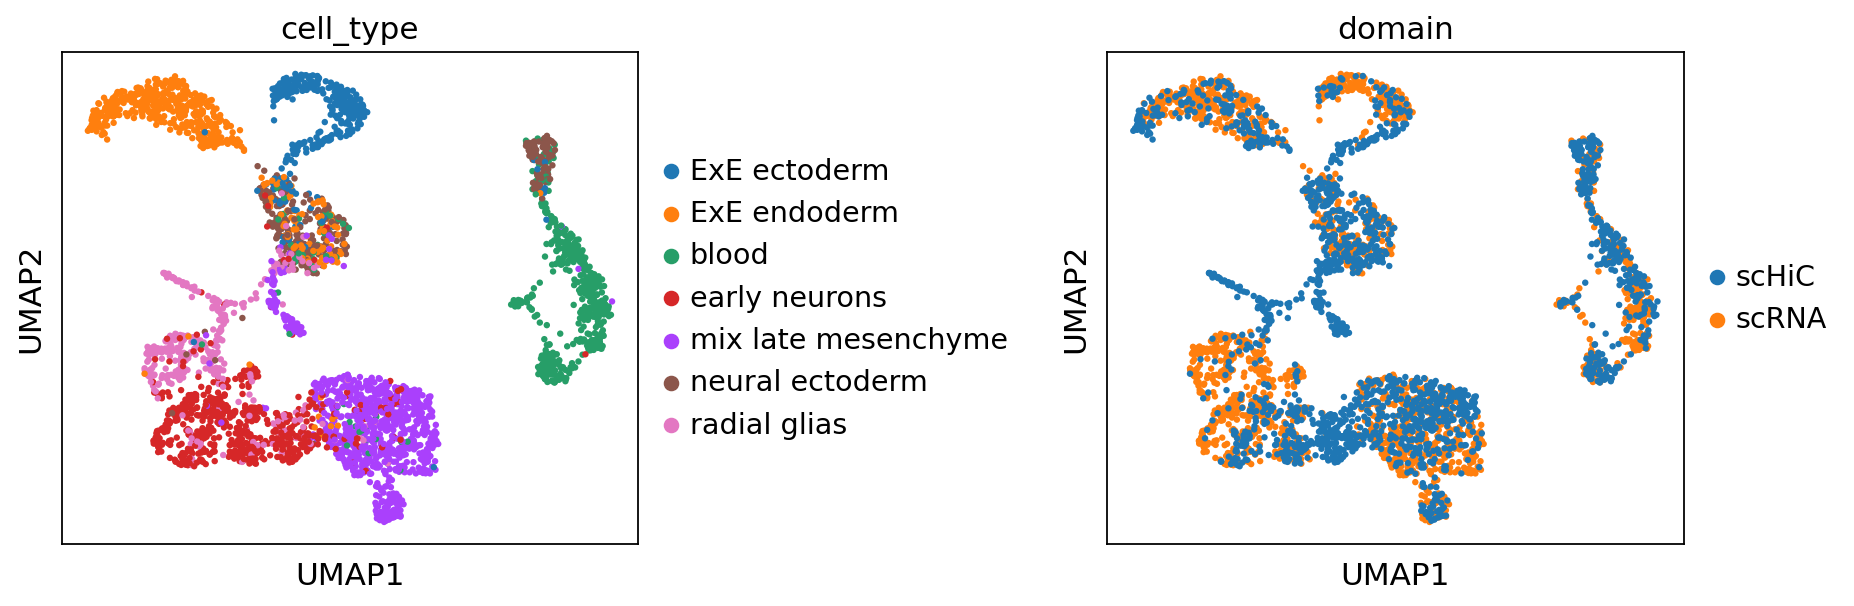

In [13]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


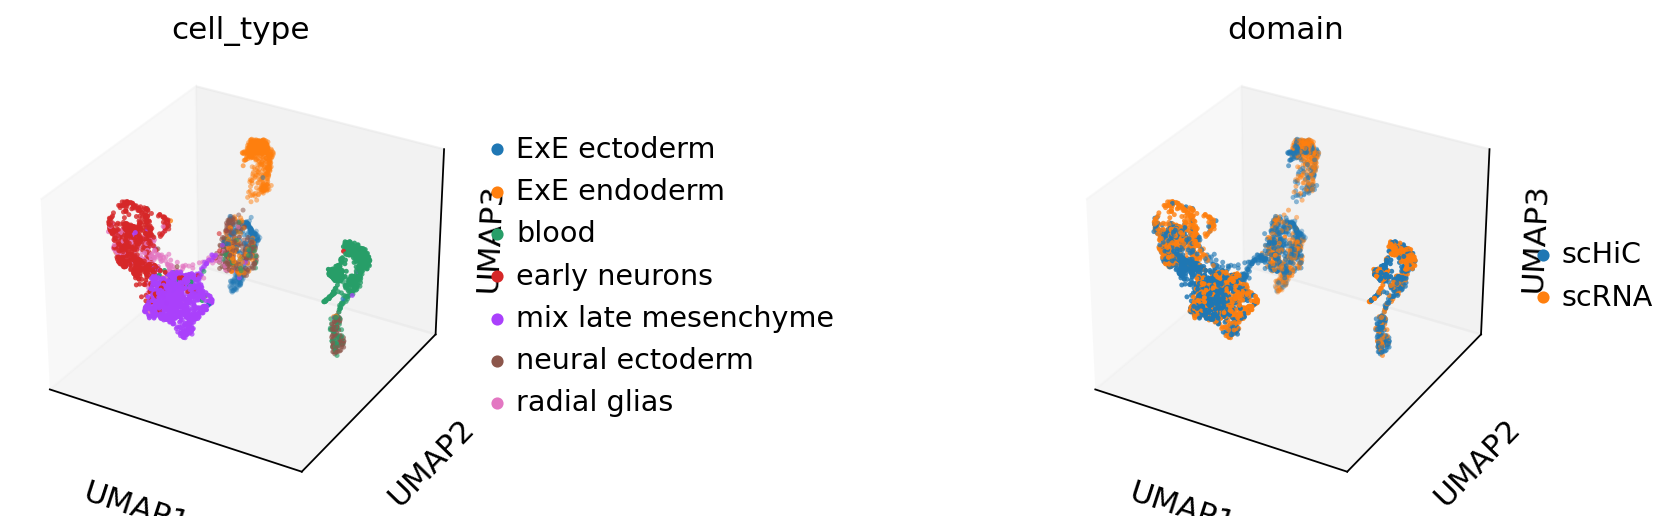

In [14]:
sc.tl.umap(combined, n_components=3)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65, projection='3d')

<IPython.core.display.Javascript object>


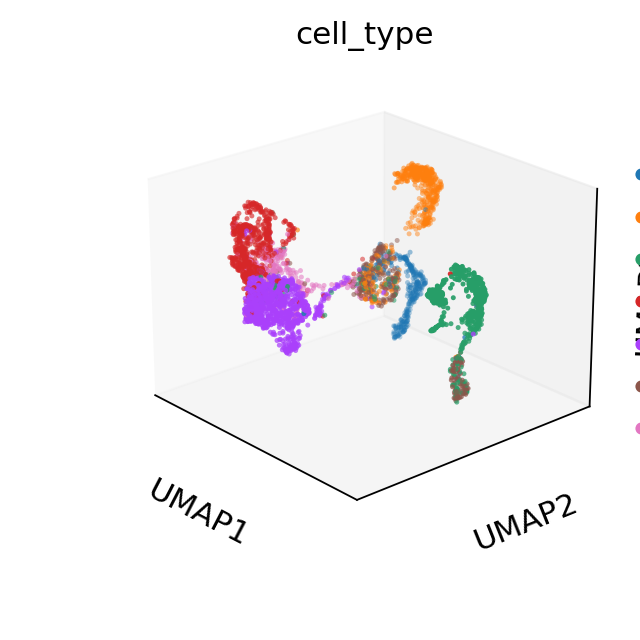

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


In [15]:
%matplotlib notebook
sc.pl.umap(combined, color=["cell_type"], projection='3d')

In [16]:
rna.write("/lmh_data/data/sclab/GSE223917/rna_result.h5ad", compression="gzip")
hic.write("/lmh_data/data/sclab/GSE223917/hic_result.h5ad", compression="gzip")